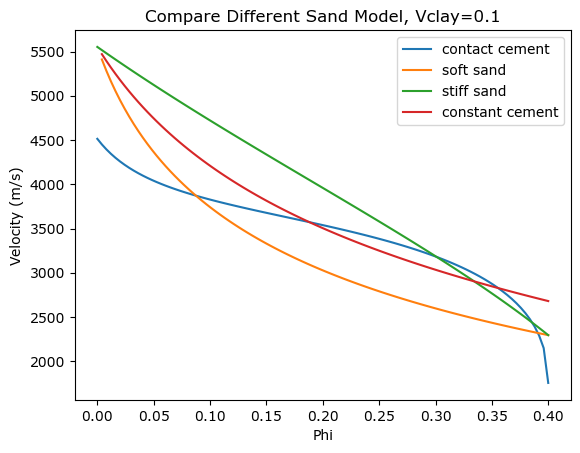

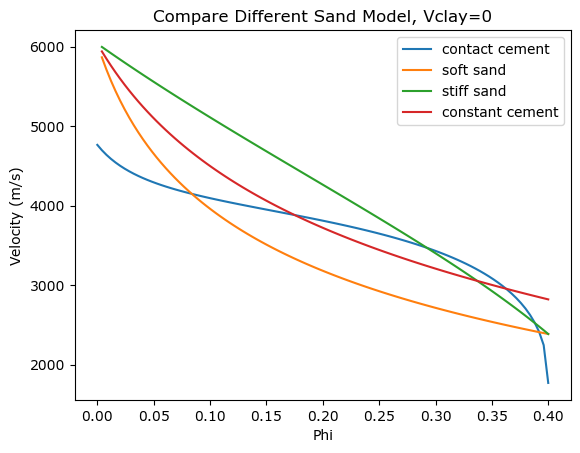

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from contact_cement_wet import contact_cement_wet
from soft_sand_wet import soft_sand_wet
from stiff_sand_wet import stiff_sand_wet

n = 6
Vclay = np.linspace(0,1,11)
phi = np.linspace(0, 0.4, 100)
phi=phi[:,np.newaxis]

vp, vs, Kcem, Gcem = contact_cement_wet(n, Vclay, phi) # Contact cement model

P = 30e6  # Pressure in Pa

vp1, vs1, Ksoft, Gsoft = soft_sand_wet(n, Vclay, phi, P) # Soft sand model
vp2, vs2, Kstiff, Gstiff=stiff_sand_wet(n, Vclay, phi, P) # Stiff sand model

n1=15 # when n is high, it is a constant cement model, Dvorkin et al 2014
vp3, vs3, Ksoft, Gsoft = soft_sand_wet(n1, Vclay, phi, P) # Constant cement model

plt.figure()
plt.plot(phi,vp[:,1],label='contact cement')
plt.plot(phi,vp1[:,1],label='soft sand')
plt.plot(phi,vp2[:,1],label='stiff sand')
plt.plot(phi,vp3[:,1],label='constant cement')
plt.xlabel('Phi')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.title('Compare Different Sand Model, Vclay=0.1')

plt.figure()
plt.plot(phi,vp[:,0],label='contact cement')
plt.plot(phi,vp1[:,0],label='soft sand')
plt.plot(phi,vp2[:,0],label='stiff sand')
plt.plot(phi,vp3[:,0],label='constant cement')
plt.xlabel('Phi')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.title('Compare Different Sand Model, Vclay=0')

phi1=phi

Text(0, 0.5, 'Velocity (km/s)')

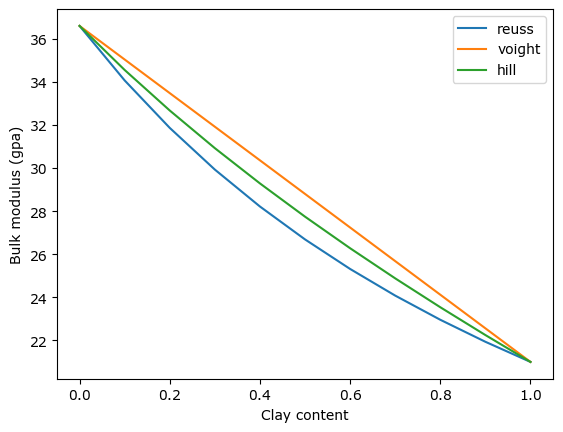

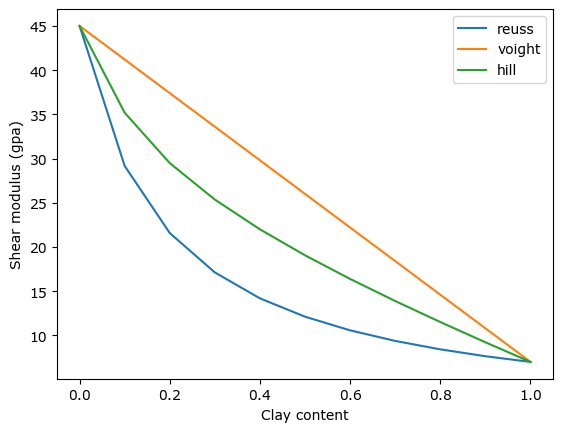

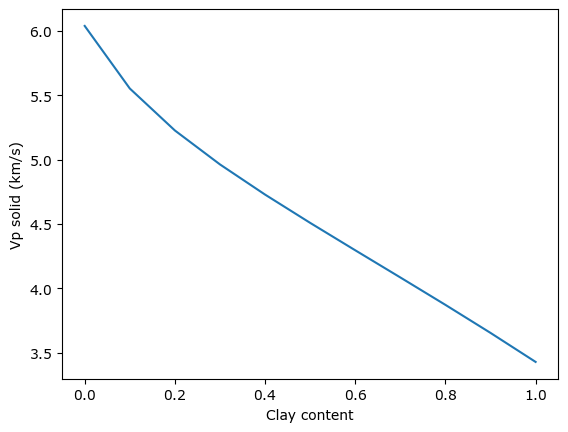

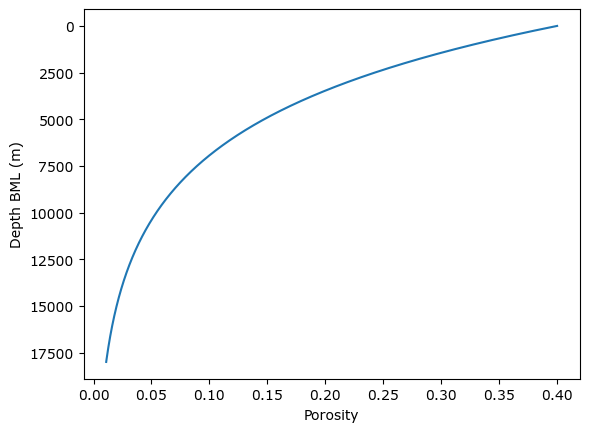

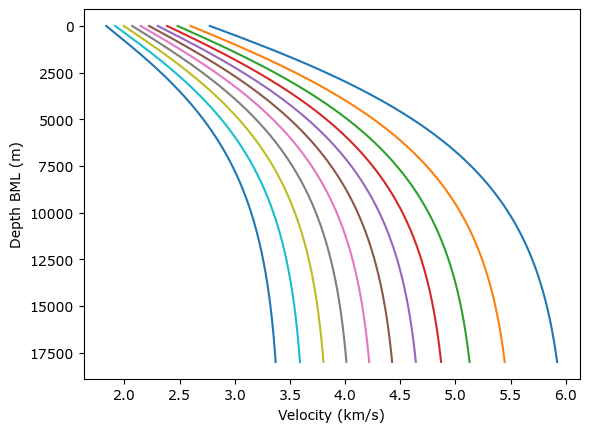

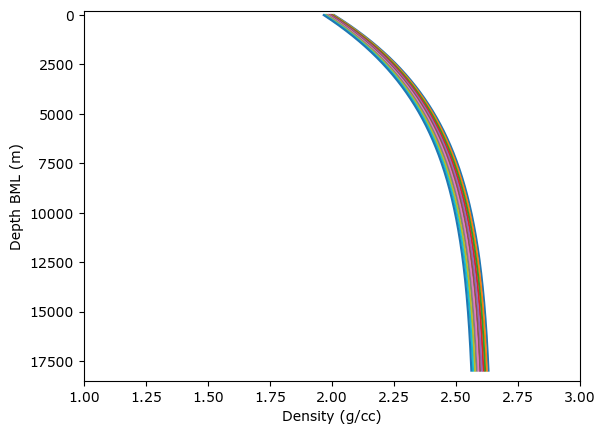

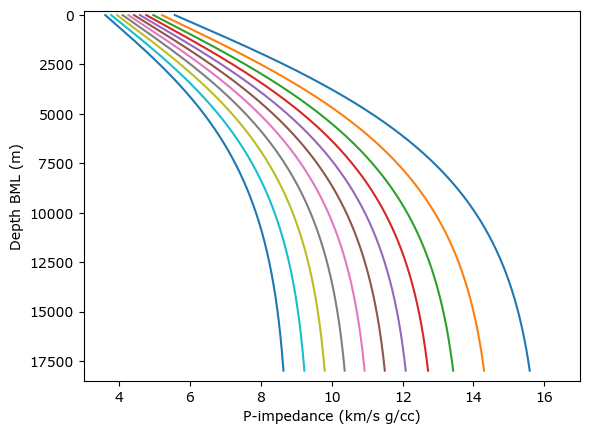

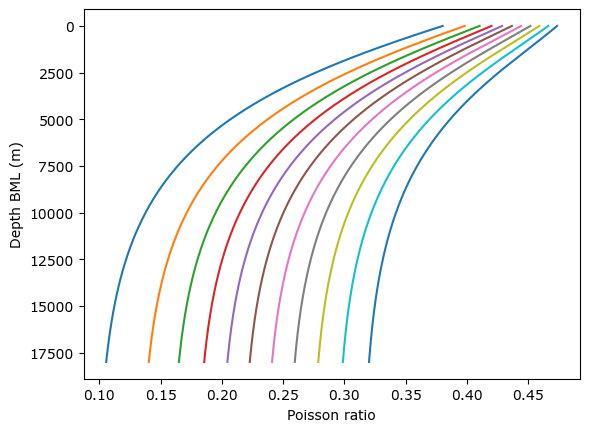

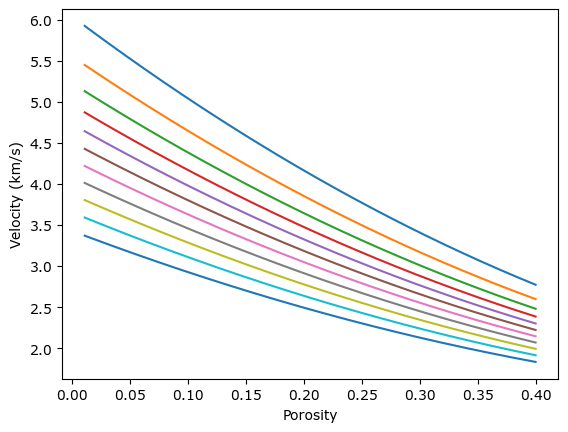

In [3]:
# Sand RPT using RHG eq

from vpvs2pr import vpvs2pr

k1=36.6 # Bulk Modulus of quartz, Gpa
g1=45 # Shear Modulus of quartz, Gpa
d1=2.65 # Density of quartz, g/cc
k2=21 # Bulk Modulus of clay, Gpa
g2=7 # Shear Modulus of clay, Gpa
d2=2.58 # Density of clay, g/cc
kf=2.6891 # Water Bulk Modulus, Gpa
rhof=1.05 # Density of Water, g/cc

zbml=np.arange(0,18000,10)
wd=100 # Sea water depth, m
row=1.03 # Sea water density, g/cc

# Porisity trend, Athy's eq, to be calibrated

phi0=0.4
c0=0.0002
phi=phi0*np.exp(-c0*zbml) # sand porosity trend, Athy eq

# Calculate vp_sand vs vclay
vclay=np.arange(0,1.1,0.1) # Define vclay array

kr=((1-vclay)/k1+vclay/k2)**(-1)
kv=k1*(1-vclay)+k2*vclay
kh=(kr+kv)/2

gr=((1-vclay)/g1+vclay/g2)**(-1)
gv=g1*(1-vclay)+g2*vclay
gh=(gr+gv)/2

ds=(1-vclay)*d1+vclay*d2 # Solid phase density, g/cc
vps=((kh+gh*4/3)/ds)**0.5 # Solid phase vp, km/s
vpf=1.5 # water vp, km/s

plt.figure()
plt.plot(vclay,kr,label='reuss')
plt.plot(vclay,kv,label='voight')
plt.plot(vclay,kh,label='hill')
plt.xlabel('Clay content')
plt.ylabel('Bulk modulus (gpa)')
plt.legend()

plt.figure()
plt.plot(vclay,gr,label='reuss')
plt.plot(vclay,gv,label='voight')
plt.plot(vclay,gh,label='hill')
plt.xlabel('Clay content')
plt.ylabel('Shear modulus (gpa)')
plt.legend()

plt.figure()
plt.plot(vclay,vps)
plt.xlabel('Clay content')
plt.ylabel('Vp solid (km/s)')

phi=phi[:,np.newaxis]
vp_sand=(1-phi)**2*vps+phi*vpf

plt.figure()
plt.plot(phi,zbml)
plt.xlabel('Porosity')
plt.ylabel('Depth BML (m)')
plt.gca().invert_yaxis()

plt.figure()
plt.plot(vp_sand,zbml)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Depth BML (m)')
plt.gca().invert_yaxis()

# Calculate ro_sand, ip_sand, and pr_sand

ro_sand=phi*rhof+(1-phi)*ds

plt.figure()
plt.plot(ro_sand,zbml)
plt.xlabel('Density (g/cc)')
plt.ylabel('Depth BML (m)')
plt.axis([1,3,-200,18500])
plt.gca().invert_yaxis()

ip_sand=vp_sand*ro_sand

plt.figure()
plt.plot(ip_sand,zbml)
plt.xlabel('P-impedance (km/s g/cc)')
plt.ylabel('Depth BML (m)')
plt.axis([3,17,-200,18500])
plt.gca().invert_yaxis()

vs_sand=(0.862*(vp_sand)-1.172) # km/s, Castagna Mudrock line

vpvs_sand=vp_sand/vs_sand
pr_sand=vpvs2pr(vpvs_sand)

plt.figure()
plt.plot(pr_sand,zbml)
plt.xlabel('Poisson ratio')
plt.ylabel('Depth BML (m)')
plt.gca().invert_yaxis()

plt.figure()
plt.plot(phi,vp_sand)
plt.xlabel('Porosity')
plt.ylabel('Velocity (km/s)')


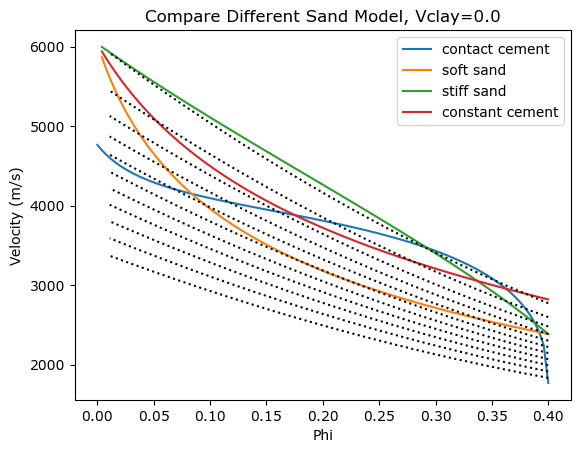

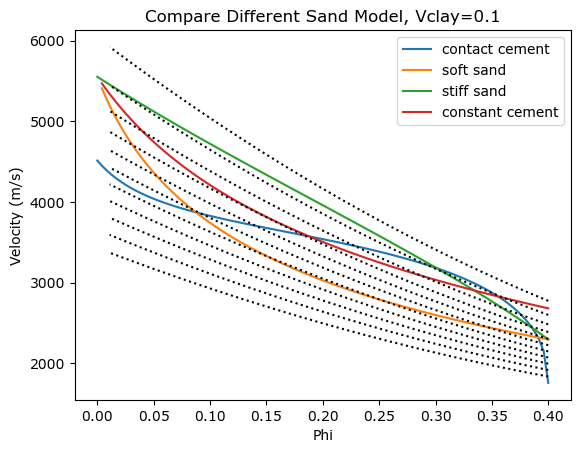

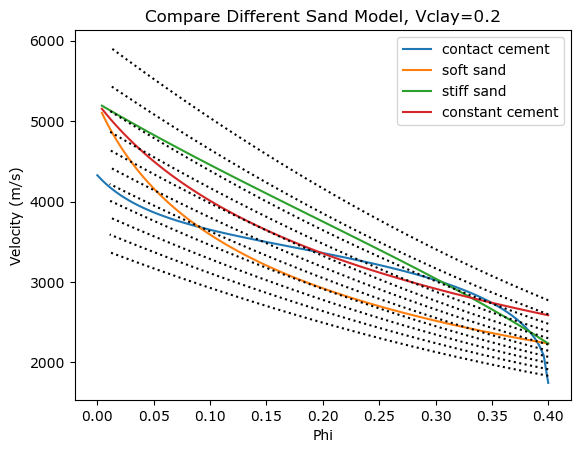

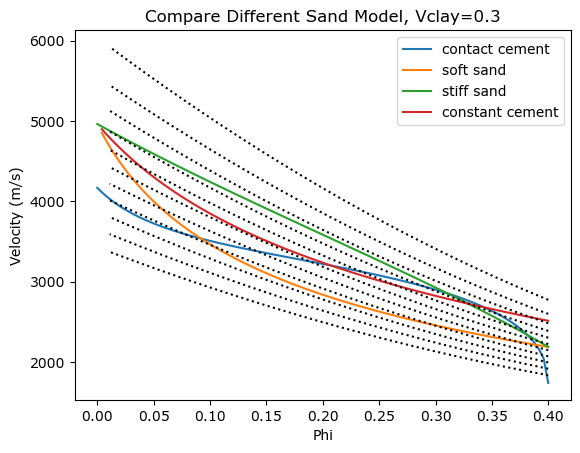

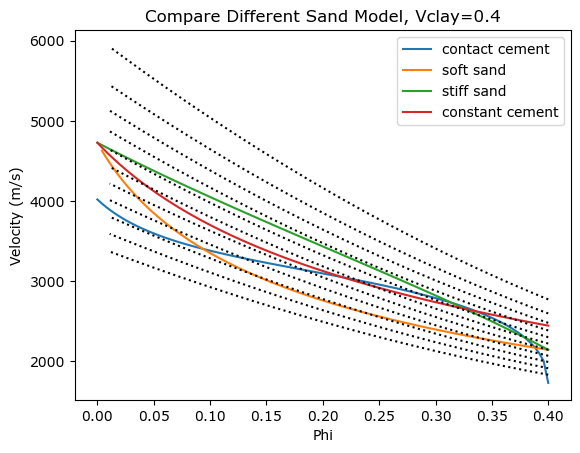

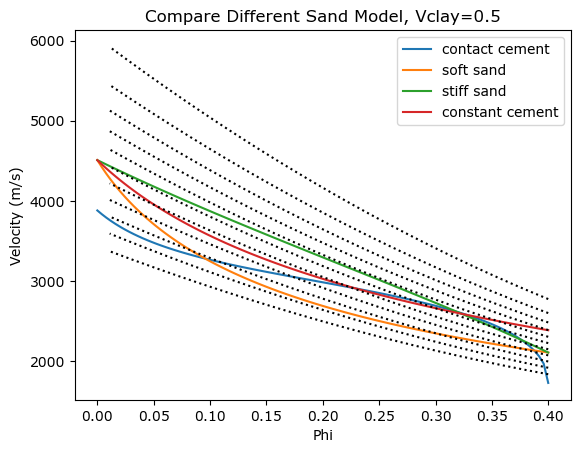

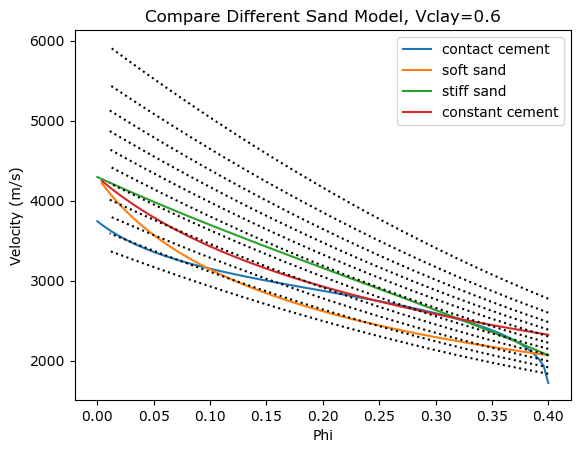

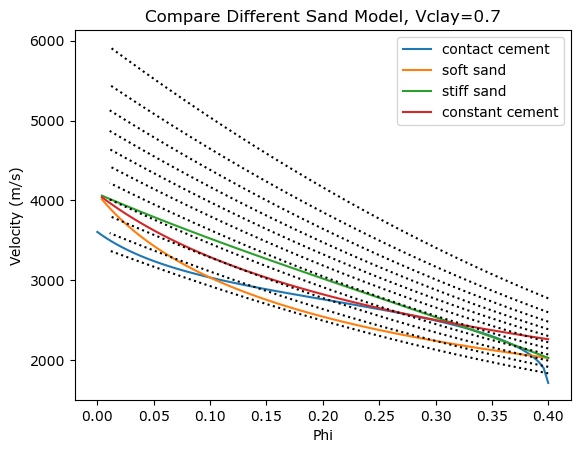

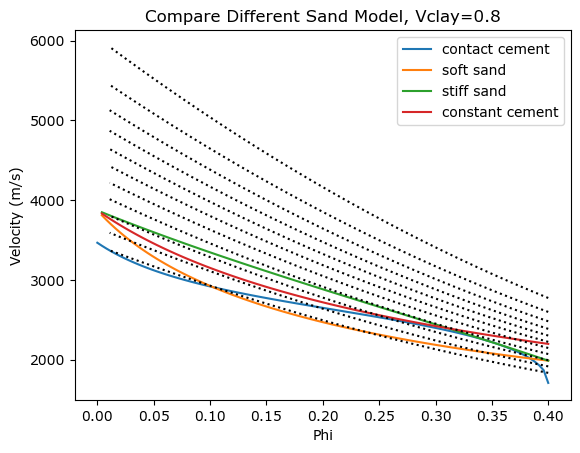

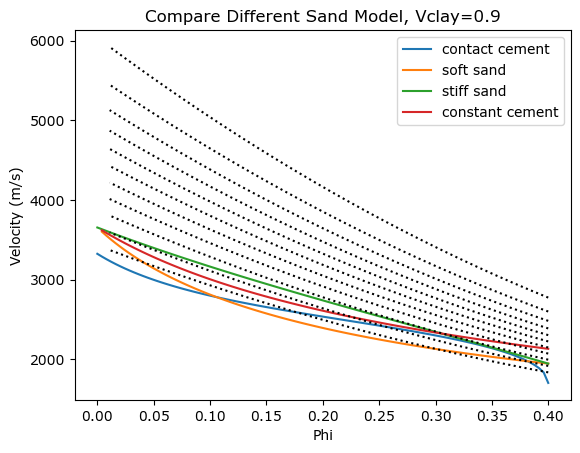

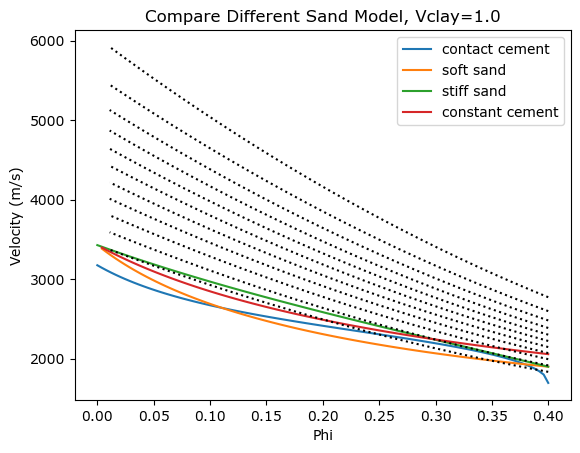

In [4]:

# Plot and compare RHG eq vs other sand models
for i in range(len(Vclay)):
    plt.figure()
    plt.plot(phi1,vp[:,i],label='contact cement')
    plt.plot(phi1,vp1[:,i],label='soft sand')
    plt.plot(phi1,vp2[:,i],label='stiff sand')
    plt.plot(phi1,vp3[:,i],label='constant cement')
    plt.plot(phi,vp_sand*1000,'k:')
    plt.xlabel('Phi')
    plt.ylabel('Velocity (m/s)')
    plt.legend()
    plt.title(f'Compare Different Sand Model, Vclay={Vclay[i]:.1f}')
